<a href="https://colab.research.google.com/github/sarahkim430/Python_sideprojects/blob/main/personaloan_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Loan data
* Data from: [Personal Loan](https://www.kaggle.com/itsmesunil/bank-loan-modelling)  
The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

##1. Explore Data

In [1]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,844 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
#import packages
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import data
bk = pd.read_excel('/content/drive/MyDrive/Colab_git/Personal_Loan.xlsx', sheet_name=1)

In [6]:
bk.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Columns:

* ID: Customer ID  
* Age: Customer's Age in completed years  
* Experience: # of years of professional experience  
* Income: Annual income of the customer($000)   

* Zipcode: Home address zip code   
* Family: Family size of the customer.    
* CCAvg: Spending on credit cards per month($000)   

* Education: Education Level(1: Undergrad, 2: Graduate, 3: Advanced/Professional)    
* Mortgage: Value of house mortgage if any($000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign? (0: N, 1: Y)  
* Securities Account: Does the customer have a securities account with the bank? (0: N, 1: Y)  
* CD Account: Does this customer have a certificate of deposit? (0: N, 1: Y)  
* Online: Does the customer use online banking facilities? (0: N, 1: Y)
* Credit Card: Does the customer use a credit card issued by UniversalBank? (0: N, 1: Y)


* categorical variables: 
               ID, zipcode, educaiont, personal loan, securities account, cd account, online, credit card
* numerical variables: 
               age, experience, income, family, ccavg, mortgage

In [7]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# categorical varibles options 
print('Education: ', bk['Education'].unique())
print('Personal Loan: ', bk['Personal Loan'].unique())
print('Securities Account: ', bk['Securities Account'].unique())
print('CD Account: ', bk['CD Account'].unique())
print('Online: ', bk['Online'].unique())
print('CreditCard: ', bk['CreditCard'].unique())

Education:  [1 2 3]
Personal Loan:  [0 1]
Securities Account:  [1 0]
CD Account:  [0 1]
Online:  [0 1]
CreditCard:  [0 1]


In [9]:
#statistics
bk.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
#summarize data
print("Total data: ", bk.shape[0]*bk.shape[1])
print("Total missing values: {} = Total data's {:.2f}% ".format(bk.isnull().sum().sum(), (bk.isnull().sum().sum()*100)/(bk.shape[0]*bk.shape[1])))
print("Thera bank's customers range in age from {} to {}, and the average age is {:.1f}.".format((bk['Age'].min()),(bk['Age'].max()), (bk['Age'].mean())))
print("The average income of Therabank customers is ${:.1f} and the highest income is ${} which is {:.1f} times the average.".format((bk['Income'].mean()*1000), (bk['Income'].max()*1000), (bk['Income'].max()/(bk['Income'].mean()))))

Total data:  70000
Total missing values: 0 = Total data's 0.00% 
Thera bank's customers range in age from 23 to 67, and the average age is 45.3.
The average income of Therabank customers is $73774.2 and the highest income is $224000 which is 3.0 times the average.


##2.Questions

* What is the relationship between income/average monthly credit card usage/family members and loans?
* What are the characteristics discovered by dividing the average monthly usage amount?
* Create a model using logistic regression to predict whether new customers will be able to borrow.


##3. Cleanse data

###3-1. Change column names

In [15]:
bk.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
# lowercase the column names 
bk.columns = ['id', 'age', 'exp', 'income', 'zip', 'fam', 'ccavg',
       'edu', 'mort', 'loan', 'secu',
       'cd', 'online', 'cc']
bk.columns

Index(['id', 'age', 'exp', 'income', 'zip', 'fam', 'ccavg', 'edu', 'mort',
       'loan', 'secu', 'cd', 'online', 'cc'],
      dtype='object')

###3-2.Remove columns

In [17]:
#id, zip code aren't significant in the analysis so we remove them 
bk1 = bk.drop(['id','zip'], axis=1, inplace=False)

In [18]:
bk1.head()

,age,exp,income,fam,ccavg,edu,mort,loan,secu,cd,online,cc
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


##4.EDA & Visualization

###4-1. Simple Analysis 

In [19]:
#aggregate the relationship between income and loans
df1 = bk1.groupby('loan')['income'].agg([np.mean,'count'])
df1.rename(columns={'mean': 'Income Mean','count':'Number of People'})

,Income Mean,Number of People
loan,,
0,66.237389,4520
1,144.745833,480


In [20]:
#aggregate the relationship between monthly average credit card usage and loans
df2 = bk1.groupby('loan')['ccavg'].agg([np.mean,'count'])
df2.rename(columns={'mean': 'CCAvg Mean','count':'Number of People'})

,CCAvg Mean,Number of People
loan,,
0,1.728982,4520
1,3.905347,480


In [21]:
#aggregate the relationship between # of family members and loans 
df3 = bk1.groupby('fam')['loan'].agg([np.mean,'count'])
df3.rename(columns={'mean': 'Personal Loan Mean','count':'Number of People'})

,Personal Loan Mean,Number of People
fam,,
1,0.072690,1472
2,0.081790,1296
3,0.131683,1010
4,0.109656,1222


###4-2. Distribution of Variables

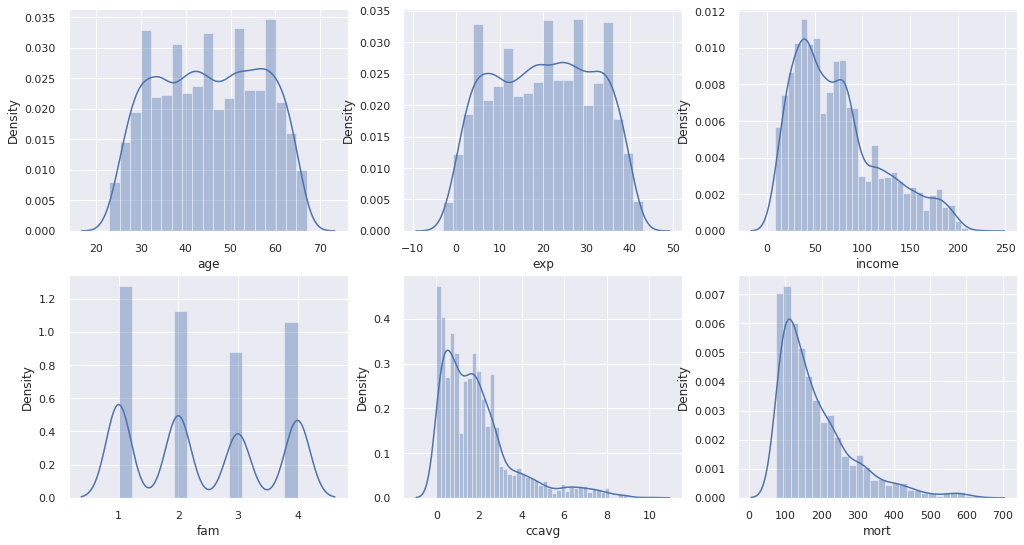

In [22]:
#distribution of categorical variables 
f, ax = plt.subplots(2, 3, figsize=(17, 9))

sns.distplot(bk1['age'], ax=ax[0,0])
sns.distplot(bk1['exp'], ax=ax[0,1])
sns.distplot(bk1['income'], ax=ax[0,2])
sns.distplot(bk1['fam'], ax=ax[1,0])
sns.distplot(bk1['ccavg'], ax=ax[1,1])
#sns.distplot(bk['mort'], ax=ax[1,2])
sns.distplot(bk1['mort'][bk1['mort'] != 0], ax=ax[1,2])

plt.show()

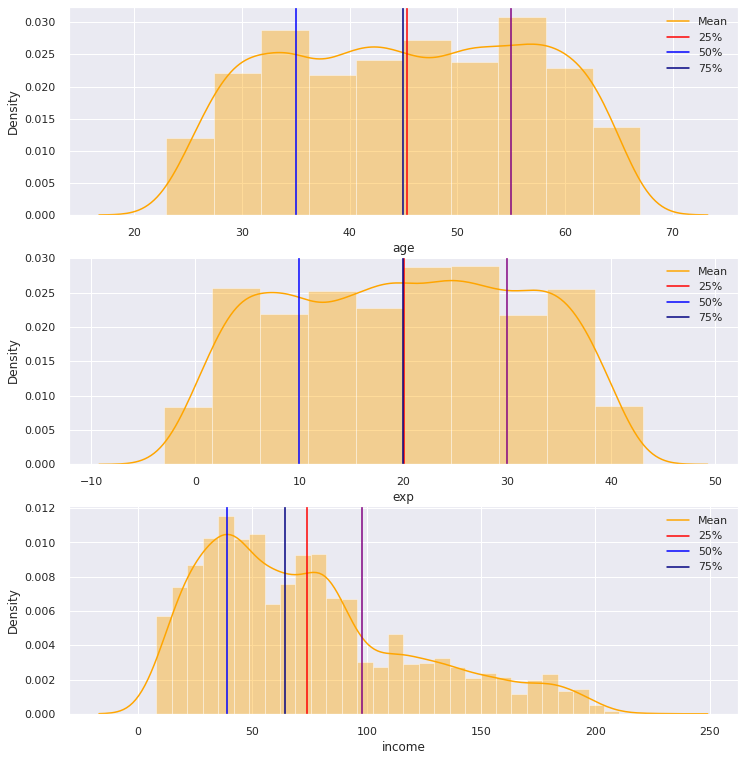

In [23]:
#more detailed graphs of age, exp, income
#draw vertical lines of the average, 25, 50, 75%
def drawline(plt, col):
    mean = bk1.describe().loc['mean', col]
    m25 = bk1.describe().loc['25%', col]
    m50 = bk1.describe().loc['50%', col]
    m75 = bk1.describe().loc['75%', col]
    plt.axvline(mean, color = 'red')
    plt.axvline(m25, color = 'blue')
    plt.axvline(m50, color = 'navy')
    plt.axvline(m75, color = 'purple')
    plt.legend({'Mean': mean, '25%' : m25, '50%' : m50, '75%' : m75})

f, ax = plt.subplots(3, 1, figsize=(12, 13))


pp = sns.distplot(bk1['age'], ax = ax[0], bins = 10, color = 'orange')
drawline(pp, 'age')
pp = sns.distplot(bk1['exp'], ax = ax[1], bins = 10, color = 'orange')
drawline(pp, 'exp')
pp = sns.distplot(bk1['income'], ax = ax[2], color = 'orange')
drawline(pp, 'income')

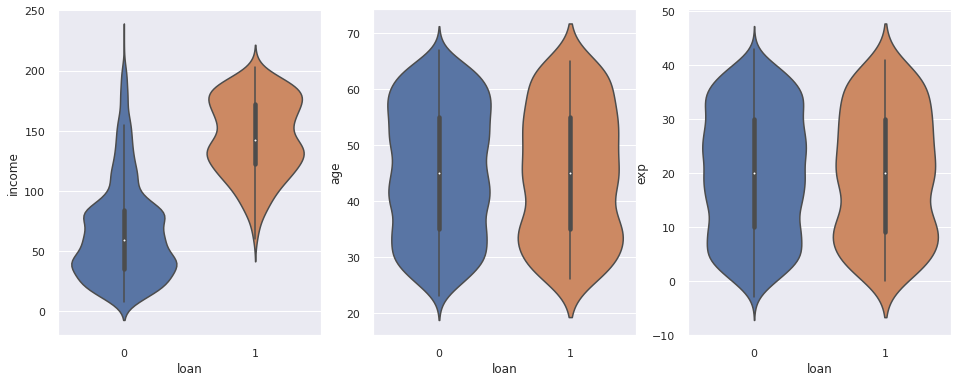

In [24]:
f, ax = plt.subplots(1, 3, figsize=(16, 6))

sns.violinplot(bk1['loan'],bk1['income'],ax=ax[0]);
sns.violinplot(bk1['loan'],bk1['age'],ax=ax[1]);
sns.violinplot(bk1['loan'],bk1['exp'],ax=ax[2]);

plt.show()

#When your income is high, you are more likely to get a personal loan!

###4-3. Identify correlations between variables 

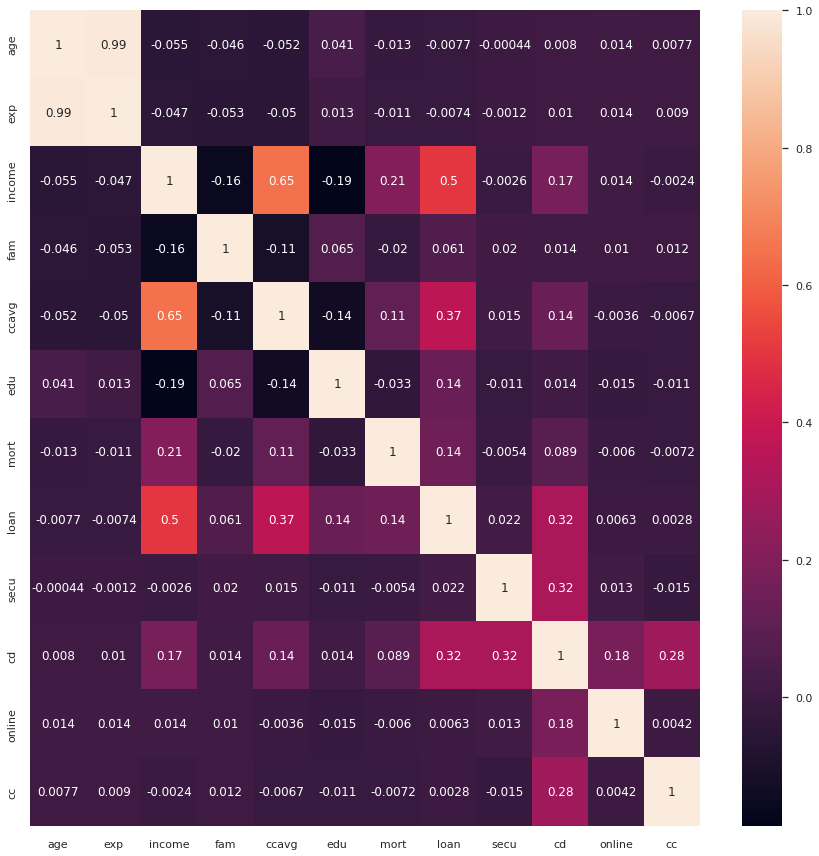

In [25]:
#Heat map
f, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(bk1.corr(), ax=ax, annot=True, fmt='.2g')

#Age and experience are the most correlated(0.99).
#CCAvg and income have a positive correlation(0.65).
#Income variable affects CCAvg, Mortgage, CD Account, Personal Loan.


###4-4. Categorize and Graph

In [26]:
#categorize the average monthly usage amount of credit cards
df4 = bk1[['ccavg', 'cc', 'loan']]
df4['ccavg_bin'] = pd.cut(df4['ccavg'], bins = [0, 2, 4, 6, 100], labels = ['0-2', '3-4', '5-6', '7+'])
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ccavg,cc,loan,ccavg_bin
0,1.6,0,0,0-2
1,1.5,0,0,0-2
2,1.0,0,0,0-2
3,2.7,0,0,3-4
4,1.0,1,0,0-2
...,...,...,...,...
4995,1.9,0,0,0-2
4996,0.4,0,0,0-2
4997,0.3,0,0,0-2
4998,0.5,0,0,0-2


In [27]:
#count the presence or absence of credit cards and the average monthly usage by section
df5 = df4.groupby(['ccavg_bin', 'cc'])['ccavg'].sum().reset_index()
df5

,ccavg_bin,cc,ccavg
0,0-2,0,2172.366667
1,0-2,1,930.333333
2,3-4,0,2361.250000
3,3-4,1,970.250000
4,5-6,0,1097.300000
5,5-6,1,413.533333
6,7+,0,1236.533333
7,7+,1,508.000000


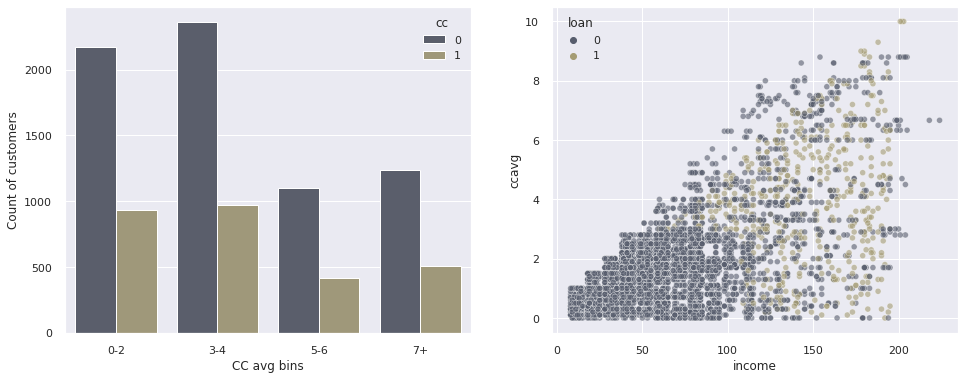

In [28]:
#barplot
f, ax= plt.subplots(1, 2, figsize = (16, 6))

sns.barplot(df5['ccavg_bin'], df5['ccavg'], hue = df5['cc'], palette= "cividis", ax=ax[0]);
ax[0].set(xlabel = 'CC avg bins', ylabel = 'Count of customers')

#scatterplot with income 
sns.scatterplot(x='income', y='ccavg', data=bk1, ax=ax[1], hue = 'loan', palette= "cividis", alpha=0.6)

##5.Logistic Regression
:estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

In [29]:
#import packages for logistic regression
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

import statsmodels.api as sm
import itertools
import time
import sklearn.preprocessing as preprocessing

###5-1. Divide dataset
1. explanatory variables (X), independent variable (Y)  
2. train/test datasets  

* Objective:  
What are the characteristics of customers who are most likely to get personal loans?

In [30]:
#Y:loan, X: the rest columns 
feature_columns = list(bk1.columns.difference(['loan']))
feature_columns

['age',
 'cc',
 'ccavg',
 'cd',
 'edu',
 'exp',
 'fam',
 'income',
 'mort',
 'online',
 'secu']

In [31]:
#X
X = bk1[feature_columns]
#y
y = bk1['loan']

In [32]:
#divide train/test datasets(7:3 ratio)
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


In [33]:
train_x

,age,cc,ccavg,cd,edu,exp,fam,income,mort,online,secu
1250,47,0,2.666667,0,2,20,1,81,0,1,0
206,49,0,1.000000,0,1,25,1,31,0,1,1
2762,56,0,3.700000,0,1,31,2,65,0,1,0
4276,50,1,7.300000,0,1,24,1,155,0,1,0
4802,35,0,2.800000,0,1,11,3,58,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2805,37,0,5.800000,0,3,12,3,182,0,1,0
2341,36,0,1.500000,0,3,10,1,91,289,1,0
1585,57,0,2.700000,0,1,31,2,131,0,0,0
3152,40,0,1.000000,0,3,15,1,83,0,0,0


In [35]:
#scale the values of each column to have a normal distribution
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

In [36]:
train_x

array([[ 0.1419242 , -0.63599873,  0.42481017, ..., -0.55371236,
         0.8242952 , -0.33964703],
       [ 0.31548629, -0.63599873, -0.53177867, ..., -0.55371236,
         0.8242952 ,  2.94423306],
       [ 0.92295362, -0.63599873,  1.01789525, ..., -0.55371236,
         0.8242952 , -0.33964703],
       ...,
       [ 1.00973466, -0.63599873,  0.44394195, ..., -0.55371236,
        -1.21315762, -0.33964703],
       [-0.46554312, -0.63599873, -0.53177867, ..., -0.55371236,
        -1.21315762, -0.33964703],
       [-1.33335358, -0.63599873, -0.589174  , ..., -0.55371236,
         0.8242952 ,  2.94423306]])

###5-2. Build a model 

In [38]:
#build a model: solver = liblinear, maximum iteration = 2000
lrm = LogisticRegression(solver='liblinear', max_iter=2000)

In [39]:
#use train dataset
lrm.fit(train_x, train_y)

LogisticRegression(max_iter=2000, solver='liblinear')

In [40]:
#check the coefficients derived from the model 
coeff_df = pd.DataFrame(lrm.coef_)
coeff_df['Intercept'] = lrm.intercept_
coeff_df

,0,1,2,3,4,5,6,7,8,9,10,Intercept
0,-0.250034,-0.481869,0.228485,0.90614,1.319806,0.271172,0.755312,2.291312,0.068812,-0.312519,-0.313708,-4.414426


###5-3. Check the modeling results

In [42]:
#check accuracy
training_predict = lrm.predict(train_x)
print('Accuracy of the model when train data is used: {:.4f}'.format(metrics.accuracy_score(train_y, training_predict)))

Accuracy of the model when train data is used: 0.9517


In [43]:
#put the test data into the model created with the train data
test_predict = lrm.predict(test_x)
print('Accuracy of the model when test data is used: {:.4f}'.format(metrics.accuracy_score(test_y, test_predict)))

Accuracy of the model when test data is used: 0.9527


###5-4. Confusion matrix & Report

In [44]:
#confusion matrix 
logistic_cm = metrics.confusion_matrix(test_y, test_predict, labels=[1,0])
print(logistic_cm)

[[  95   49]
 [  22 1334]]


In [45]:
logistic_cm_df = pd.DataFrame(logistic_cm, index = [i for i in ['1','0']], columns = [i for i in ['predict 1', 'predict 0']])
logistic_cm_df

,predict 1,predict 0
1,95,49
0,22,1334


In [ ]:
f, ax= plt.subplots(1, 1, figsize = (10, 6))
plt.title('Confusion Matrix for Logistic Regression Model', size=15)
sns.heatmap(logistic_cm_df, annot=True, fmt='g',ax=ax)

#True Positives: A customer who is correctly identified as receiving the loan offer  =  95
#True Negatives (TN): A customer who is correctly identified as rejecting the loan offer  =  1334
#False Positives (FP): A customer who is incorrectly identified as receiving the loan offer(Type I error)  =  22
#False Negatives (FN): A customer who is incorrectly identified as rejecting the loan offer(Type II error)  =  49

In [46]:
print('Logistic Regression Model - Classification Report')
print('')
print(metrics.classification_report(test_y, test_predict, labels=[1,0]))

Logistic Regression Model - Classification Report

              precision    recall  f1-score   support

           1       0.81      0.66      0.73       144
           0       0.96      0.98      0.97      1356

    accuracy                           0.95      1500
   macro avg       0.89      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



##6.Review

* Thera bank dataset:  
Total data:  70000  
Total missing values: 0 = Total data's 0.00%   
Thera bank's customers range in age from 23 to 67, and the average age is 45.3.  
The average income of Therabank customers is $73,774.2 and the highest income is $224,000 which is 3.0 times the average.  

* What is the relationship between income/average monthly credit card usage/family members and loans?  

    : The borrower's income is about three times higher than that of the non-borrower  
    : The average monthly credit card usage is about twice as high as that of the person who took out the loan  
    : The larger the number of family members, the higher the loan amount, but it is not directly proportional  
